<a href="https://colab.research.google.com/github/gdutr/gdutr.github.io/blob/main/Etude_maladie_foie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première Exploration du dataset

In [29]:
# Importation des modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# valeurs manquantes
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_foie = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv", na_values=nan)
pd.set_option("display.max_row", 111)

In [73]:
# 5 premières lignes
df_foie.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Ill
0,65.0,Female,0.7,0.1,187,16.0,18.0,6.8,3.3,0.90,yes
1,62.0,Male,10.9,5.5,699,64.0,100.0,7.5,3.2,0.74,yes
2,62.0,Male,7.3,4.1,490,60.0,68.0,7.0,3.3,0.89,yes
3,58.0,Male,1.0,0.4,182,14.0,20.0,6.8,3.4,1.00,yes
4,72.0,Male,3.9,2.0,195,27.0,59.0,7.3,2.4,0.40,yes


In [74]:
display(df_foie.dtypes.value_counts())

float64    8
object     2
int64      1
dtype: int64

In [75]:
# Affichage des noms de colonnes
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Ill'],
      dtype='object')

In [80]:
# Affichage description
display(df_foie.describe())

# Affichage infos
print(df_foie.info())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,579.000000,583.000000,583.000000,583.000000,579.000000,576.000000,583.000000,583.000000,579.000000
mean,44.758204,3.298799,1.486106,290.576329,80.974093,110.723958,6.483190,3.141852,0.947064
std,16.245103,6.209522,2.808498,242.937989,183.224127,290.576935,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.250000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    float64
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    float64
 6   Aspartate_Aminotransferase  576 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Ill                         583 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 50.2+ KB
None


In [81]:
cat_cols = [col for col in df_foie.select_dtypes(['object']).columns]

for col in cat_cols:
  print(f"{col} : {df_foie[col].unique()} values\n")

Gender : ['Female' 'Male'] values

Ill : ['yes' 'no'] values



La colonne Dataset represente la catégorie des personne malade (1) ou des personnes saines (2), nous allons renommer la colonne et les données afin d'avoir une meilleur visualisation.

# Data Cleaning

In [34]:
# Rennomage colonnes
df_foie.rename(columns = {"Dataset":'Ill'}, inplace = True)

# Rennomage données dans dataset
df_foie['Ill'] = df_foie['Ill'].apply(lambda x : 'yes' if x==1 else 'no')

## Valeurs manquantes

In [76]:
df_foie.isna().sum()

Age                           4
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      4
Aspartate_Aminotransferase    7
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Ill                           0
dtype: int64

<Axes: title={'center': 'Pourcentage de valeur manquantes'}>

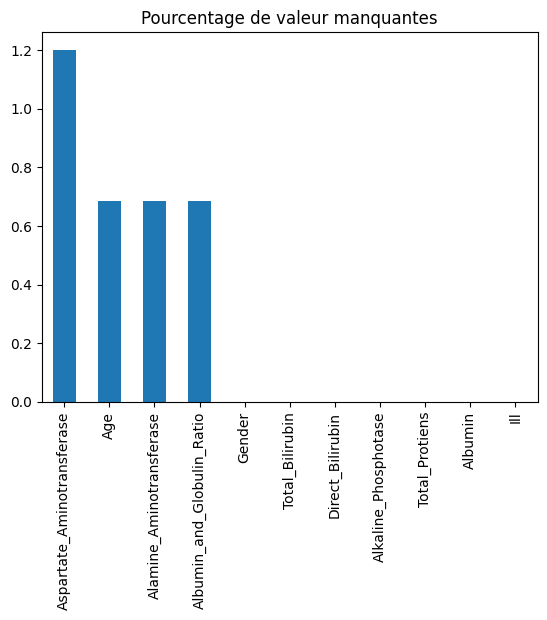

In [83]:
(df_foie.isna().mean().sort_values(ascending=False)*100).plot(kind = "bar", title = "Pourcentage de valeur manquantes")

<Axes: >

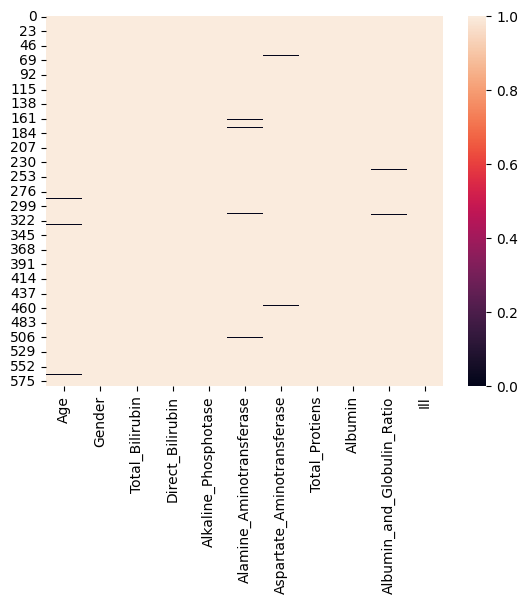

In [82]:
sns.heatmap(df_foie.notna())

Nous avons très peu de valeurs manquantes dans ce dataset, on peut donc les supprimer.

In [84]:
# Suppression des valeurs manquantes
df_foie.dropna(inplace = True)

In [36]:
for col in df_foie.select_dtypes(object).columns:
  print(df_foie[col].value_counts())
  print('\n')

Male      441
Female    142
Name: Gender, dtype: int64


yes    416
no     167
Name: Ill, dtype: int64




# Data visualisation et statistiques

In [102]:
#identifier variables catégorielles stockées dans une liste
cat_df = [col for col in df_foie.columns if df_foie[col].dtype == 'object']
num_df = [col for col in df_foie.columns if df_foie[col].dtype != 'object']

print(cat_df)
print(num_df)

['Gender', 'Ill']
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


<Axes: xlabel='Gender', ylabel='count'>

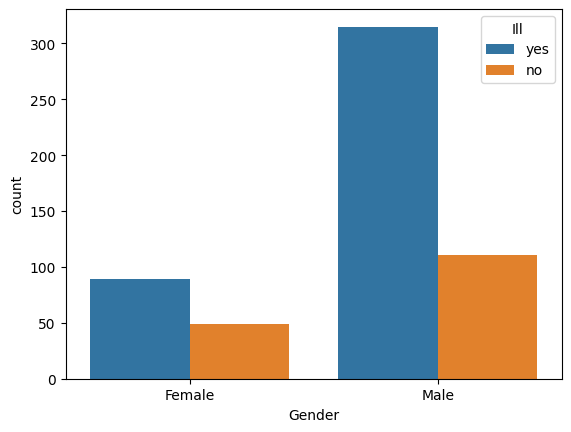

In [92]:
sns.countplot(data = df_foie, x = 'Gender', hue='Ill')

Dans le dataset nous avons une grande majorité d'hommes, avec une proportion differentes de malades et de sains entre les hommes et les femmes

9












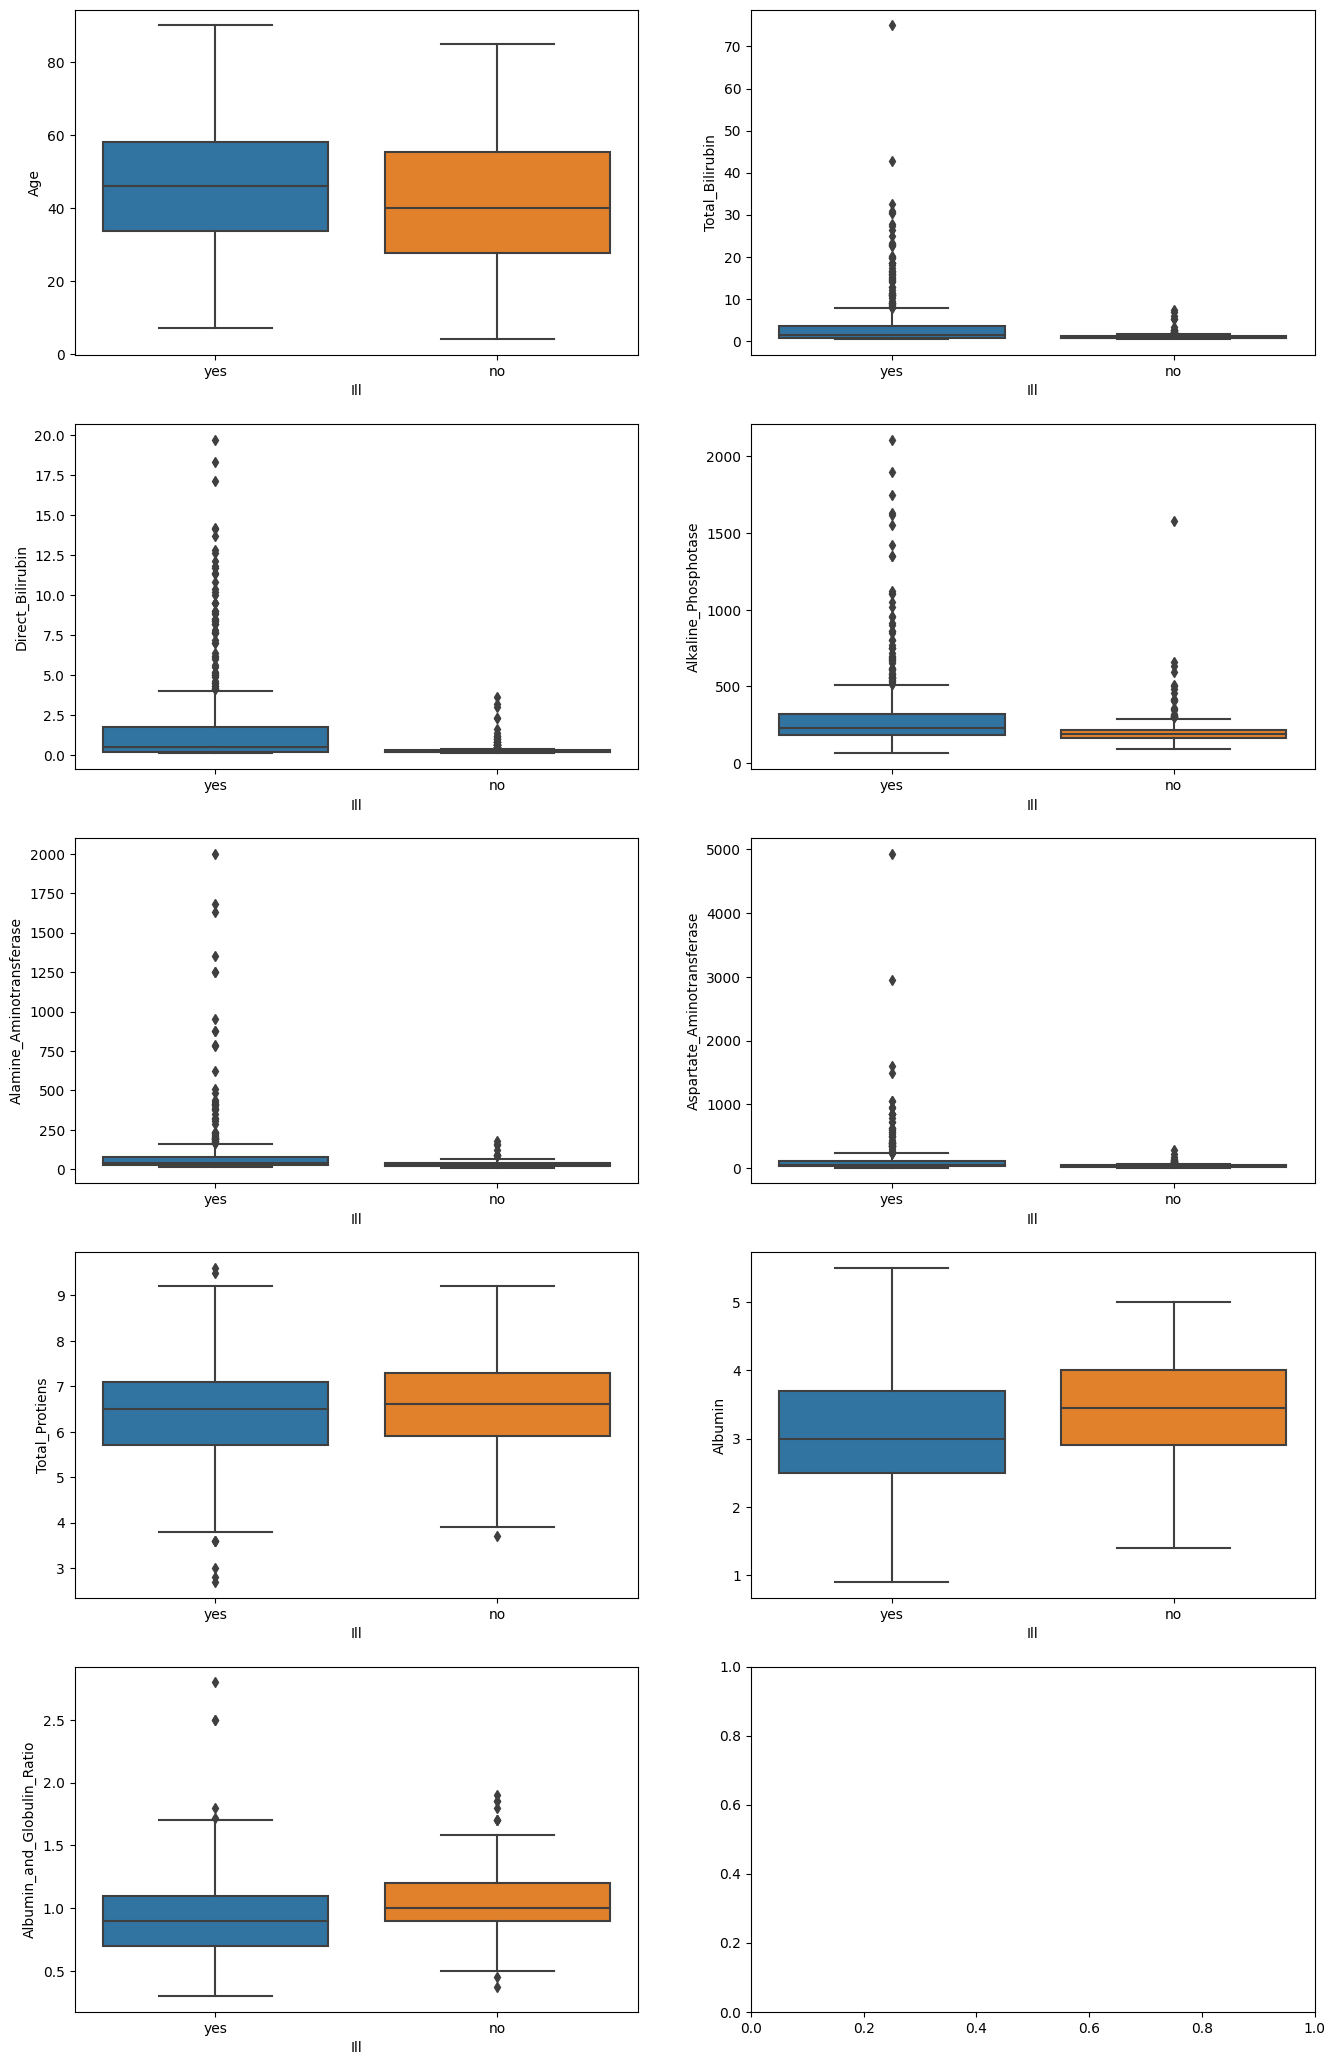

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [93]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_foie.select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(y = df_foie[list_cols[id]], x = df_foie['Ill'], ax=axes[row,col]) #.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

On peut remarquer que ce sont les patients malades qui concentrent le plus d'outliers en termes statistique, cependant ces outliers n'en sont pas vraiment en termes médicales, on peut donc les considérer comme valides.

In [59]:
list_cols = df_foie.select_dtypes([int,float]).columns.to_list()
list_cols = list_cols +['Ill']

9


<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='yes'], ax=axes[row,col])
<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,c

<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='yes'], ax=axes[row,col])
<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,c

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
<ipython-input-67-76bf2d0e1c92>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Il

<ipython-input-67-76bf2d0e1c92>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])


<Axes: xlabel='Ill', ylabel='Age'>

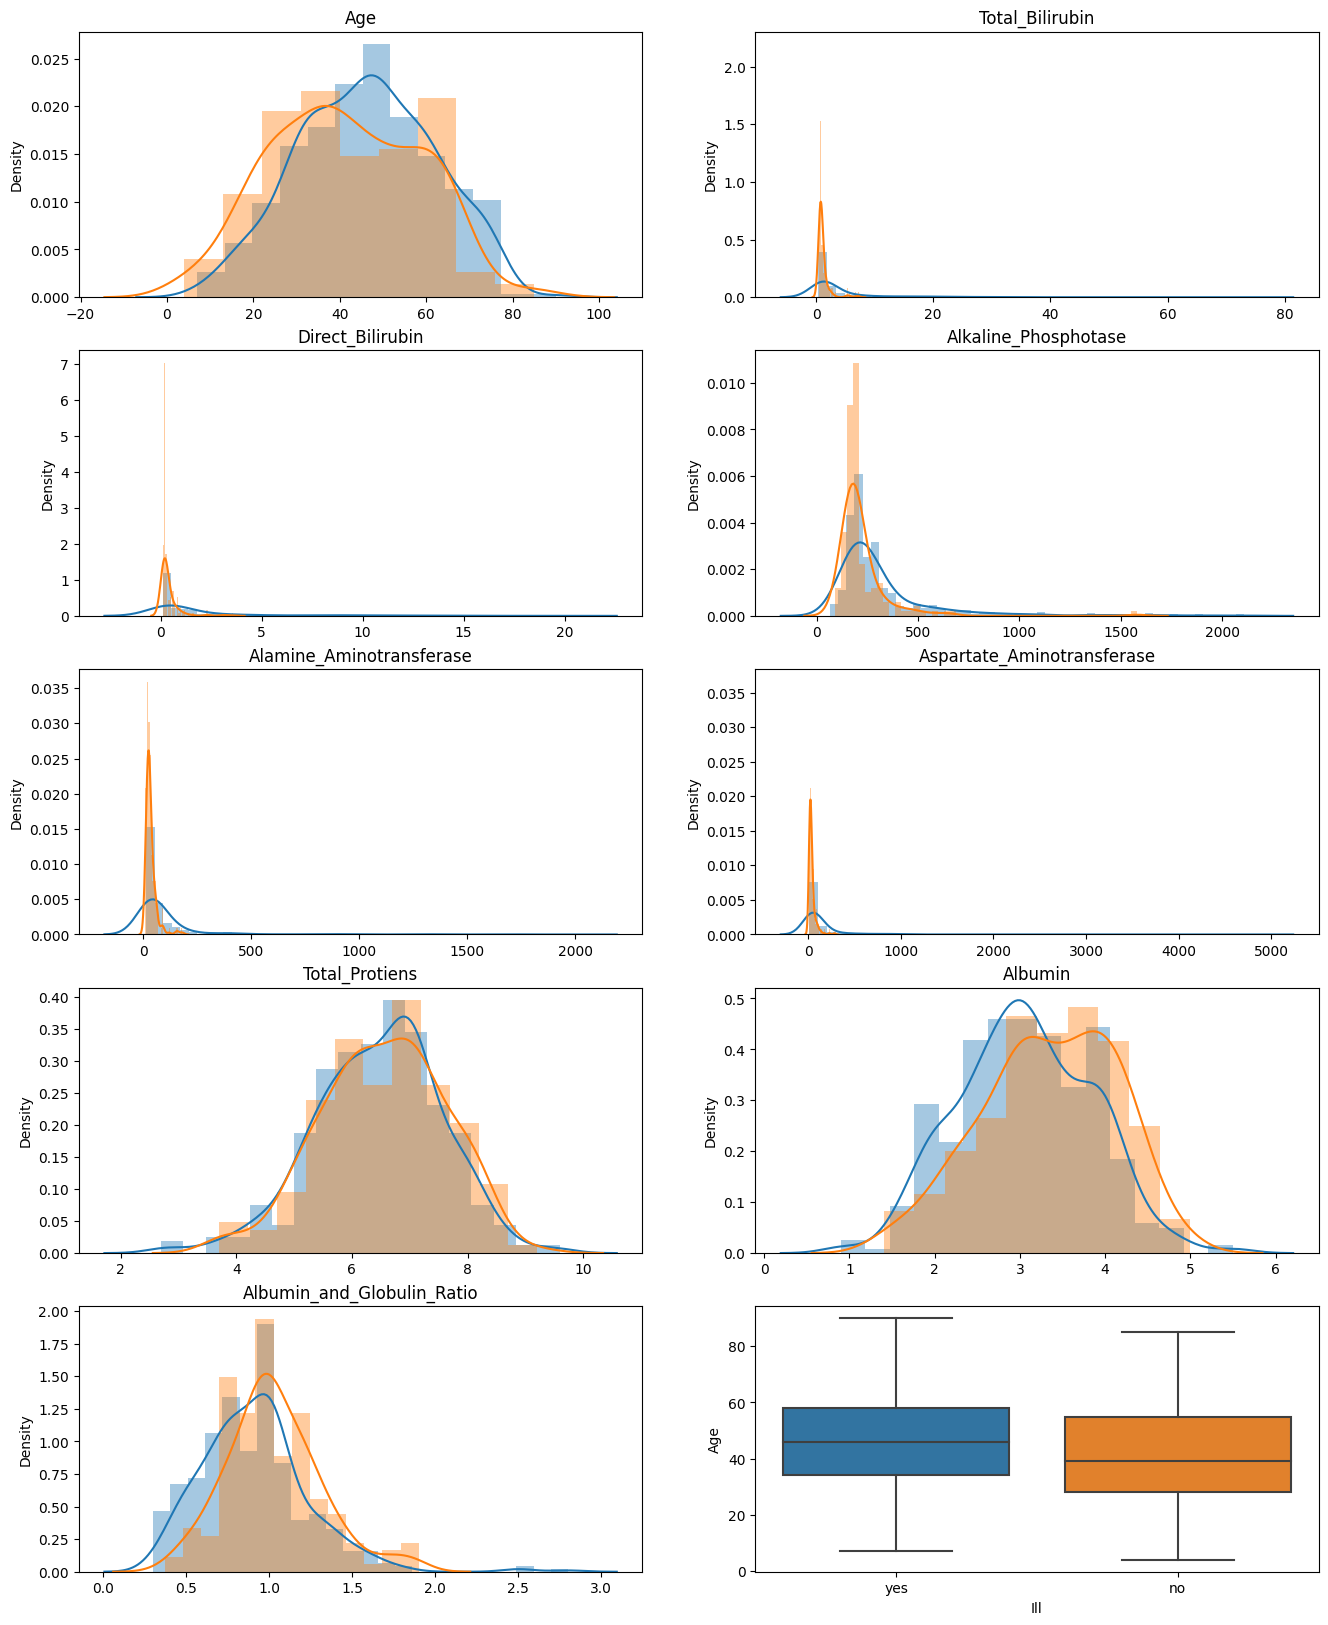

In [67]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 20))
list_cols = df_foie.select_dtypes([int,float]).columns.to_list()#+['Ill']

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='yes'], ax=axes[row,col])
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Ill']=='no'], ax=axes[row,col])#.set(title=list_cols[id])
      axes[row,col].set_title(list_cols[id])
      id += 1
      print("\n")

sns.boxplot(y = df_foie[list_cols[0]], x = df_foie['Ill'], ax=axes[nbre_ligne-1,nbre_cols-1])



Nous pouvons observer que le taux d'albumin est legerement plus faibles pour les personnes malades que les personnes sains.



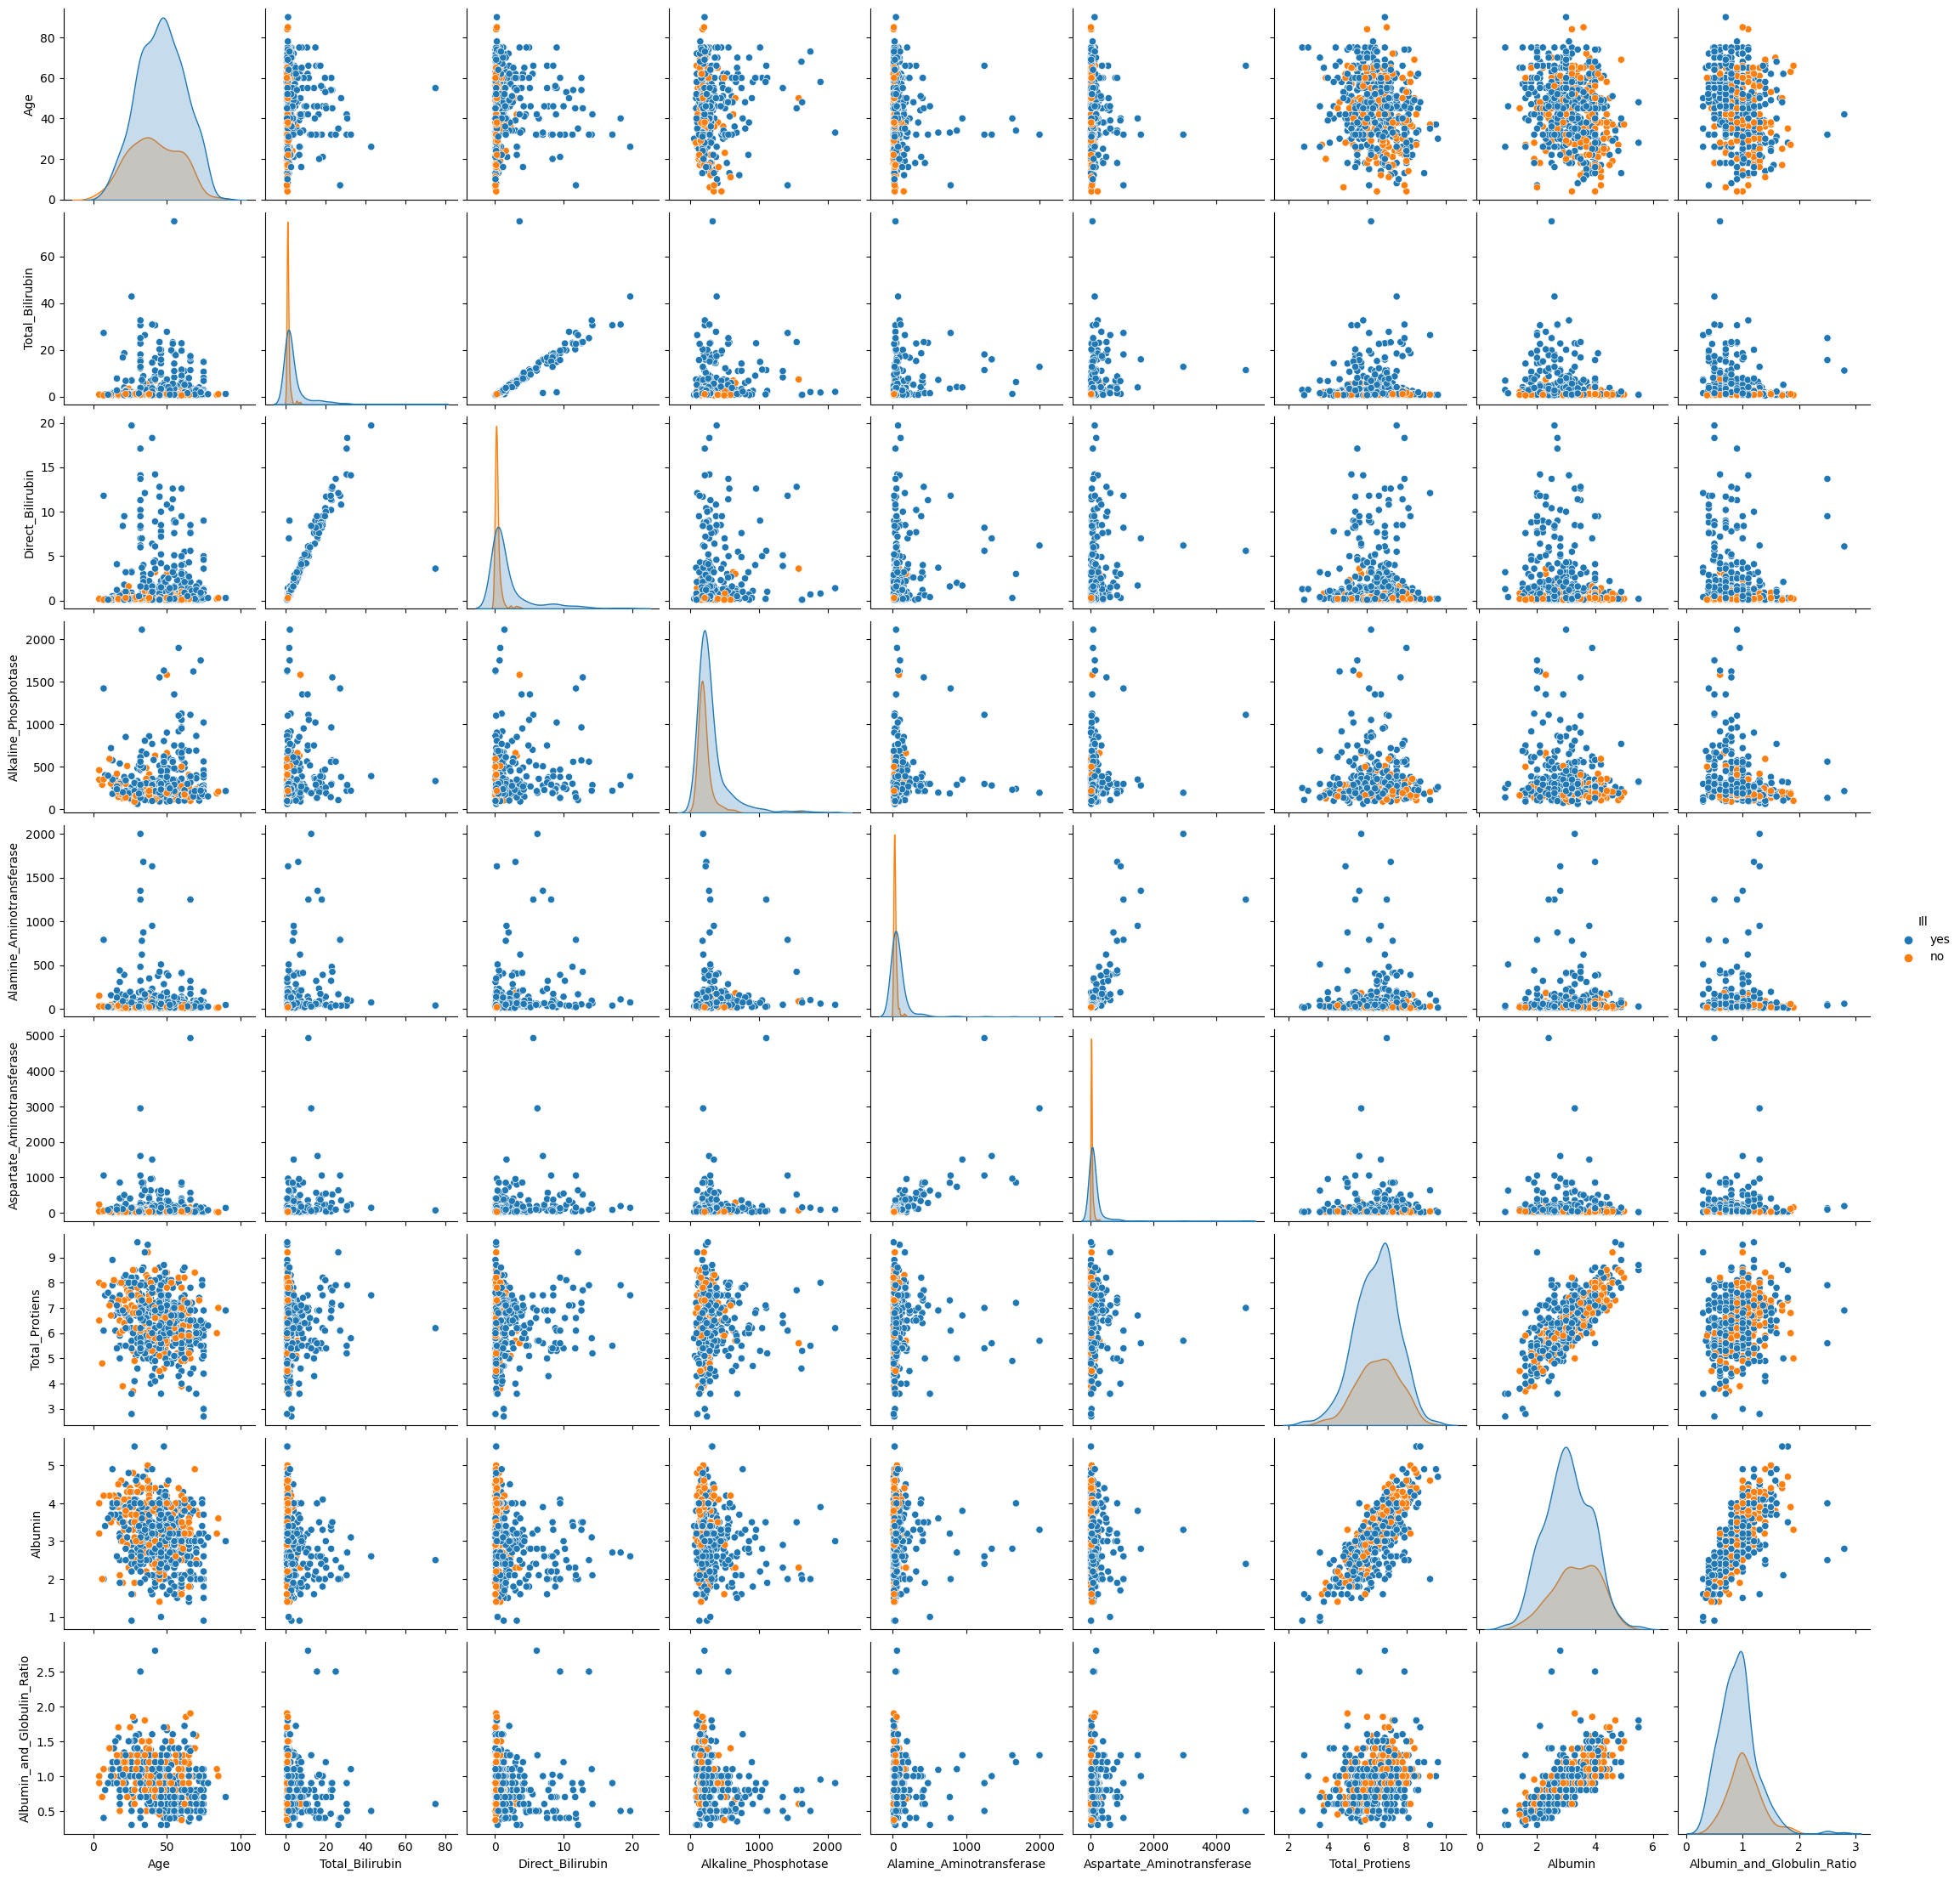

In [68]:
columns_num = df_foie.select_dtypes([int,float]).columns.to_list().append('Ill')
# Pairplot
sns.pairplot(data = df_foie, hue = 'Ill')

In [ ]:
sns.scatterplot(data = df_foie, x = 'Age', y = 'Albumin', hue = 'Ill')

<ipython-input-99-0bc6ce955d30>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)


<Axes: >

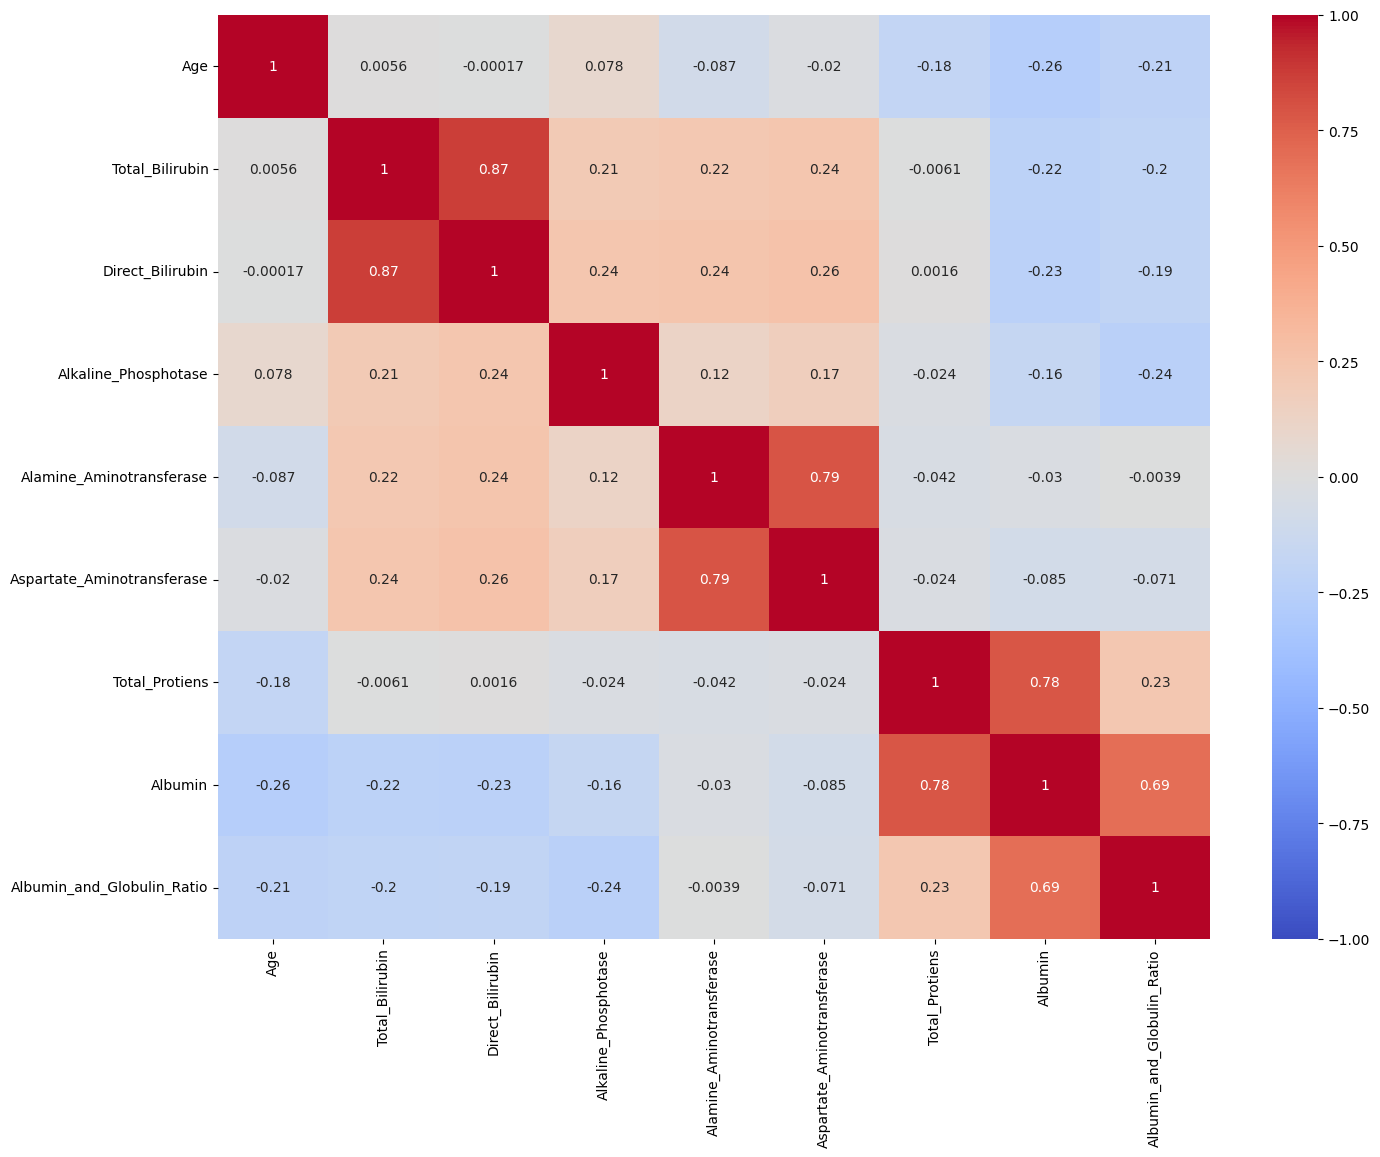

In [99]:
# Matrice de corrélation de Pearson
plt.figure(figsize = (16,12))
sns.heatmap(df_foie.corr(), annot = True, cmap = 'coolwarm', center = 0, vmin = -1, vmax = 1)

Il y a certaines corrélations qui apparaisssent logiquement comme direct_bilirubin et le total_bilirubin

In [104]:
#Test Anova pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in num_df:
    result = smf.ols(f'{col} ~ Ill', data=df_foie).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova

,col,F,p_value
0,Age,9.879889,1.759075e-03
1,Total_Bilirubin,27.512612,2.214059e-07
2,Direct_Bilirubin,35.357804,4.822494e-09
3,Alkaline_Phosphotase,19.197624,1.406514e-05
4,Alamine_Aminotransferase,15.609607,8.776982e-05
5,Aspartate_Aminotransferase,13.314608,2.878793e-04
6,Total_Protiens,1.059293,3.038192e-01
7,Albumin,16.744271,4.903544e-05
8,Albumin_and_Globulin_Ratio,17.293999,3.702443e-05


Toutes les variables numériques semblent influer sur la probabilité que le patient ait ou non une maladie chronique du foie excepté le total_protiens.

In [105]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in cat_df:
    table = pd.crosstab(df_foie[col], df_foie['Ill'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

,col,statistique,p_value,degre_liberte
0,Gender,4.128282,4.217215e-02,1
1,Ill,559.089695,1.326299e-123,1


Toutes les variables ont passés le test de khi 2, elles ne sont donc pas independantes.